In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

training = pd.read_csv('racism_train.csv', encoding="latin1")
testing = pd.read_csv("racism_test.csv", encoding = 'latin1')

In [ ]:
def decode_all(text):
    return text.encode("ascii", errors = "replace").decode("utf-8")

In [ ]:
training["decode"] = training["tweet"].apply(decode_all)

<AxesSubplot:xlabel='label', ylabel='count'>

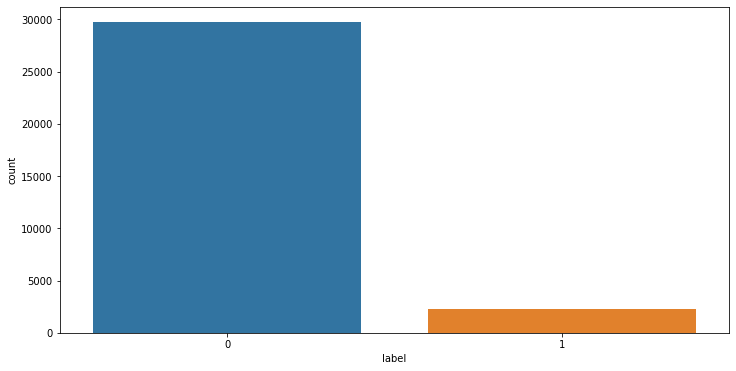

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='label',data=training)

In [ ]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

training['clean_tweet'] = np.vectorize(remove_pattern)(training['decode'], "@[\w]*")

In [ ]:
def con_map(text):

    contraction_map = {
        "ain't": "is not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'd've": "I would have",
        "I'll": "I will",
        "I'll've": "I will have",
        "I'm": "I am",
        "I've": "I have",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",
        "otw": "on the way",
        "u": "you",
        "ur": "your",
        }

    words = text.split()
    result = []
    for word in words:
        word = word.strip()
        if word in contraction_map:
            result.append(contraction_map[word])
        else:
            result.append(word)
    
    return ' '.join(result) 

In [ ]:
training['clean_tweet'] = training['clean_tweet'].apply(con_map)
training

,id,label,tweet,decode,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause the...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,#model i love you take with you all the time i...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...,ate @user isz that youuu??????????????????????...,ate isz that youuu????????????????????????????...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning on ...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso ..."


In [ ]:
#method 1
import string
def strip_all_entities(text):
    entity_prefixes = ['@']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word[0] not in entity_prefixes and word.isalpha():
            words.append(word)
    return ' '.join(words)

training['clean_tweet'] = training['clean_tweet'].apply(strip_all_entities)
training

,id,label,tweet,decode,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause they...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love you take with you all the time in ur
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...,ate @user isz that youuu??????????????????????...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning on ...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso conde...


In [ ]:
training['clean_tweet'] = training['clean_tweet'].str.replace(r"http\S+", "")
training.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet,decode,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause they...
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,model i love you take with you all the time in ur
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
tokenized_tweet = training['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, lyft, credit, i, cannot, use, ca...
2                              [bihday, your, majesty]
3    [model, i, love, you, take, with, you, all, th...
4               [factsguide, society, now, motivation]
Name: clean_tweet, dtype: object

In [ ]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
stop_words = list(stopwords.words('english'))

#words_token = tokenized_tweet.apply(word_tokenize)

training['stopwords_tweets'] = tokenized_tweet.apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install emoji

     |████████████████████████████████| 170 kB 7.1 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=7f8710f47bb148e8004a6cc1d8eee7f58b8048b878d7debc9ec725479ffba45a
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import emoji
tokenized_tweet = training['stopwords_tweets'].apply(lambda x: x.split())

# emoji.demojize(text, delimiters=("", "")).replace("_", " ") # remove replace so that sentiment will be tagged to whole emoji
# apply to training

training['plaintext_tweet']= tokenized_tweet.apply(lambda x: ' '.join([emoji.demojize(w, delimiters=("", "")) for w in x]))

training['plaintext_tweet']

0        father dysfunctional selfish drags kids dysfun...
1        thanks lyft credit cannot use cause offer whee...
2                                           bihday majesty
3                                  model love take time ur
4                            factsguide society motivation
                               ...                        
31957                                        ate isz youuu
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning way work sad
31960      sikh temple vandalised calgary wso condemns act
31961                                         thank follow
Name: plaintext_tweet, Length: 31962, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#method 1 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(w,pos="v") for w in w_tokenizer.tokenize(text)])

#df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
training['final_tweet'] = training["plaintext_tweet"].apply(lemmatize_text)

In [ ]:
training = training.drop_duplicates(subset=['final_tweet'])


In [ ]:
# transferring useful columns into new df
processed = training[['label', 'final_tweet']].copy()

In [ ]:
processed.to_csv('processed.csv', index=False)

In [ ]:
# using full dataset
from sklearn.model_selection import train_test_split

X_train_normal, X_test_normal, Y_train_normal, Y_test_normal = train_test_split(processed['final_tweet'],processed['label'],shuffle=True, test_size=0.2, random_state=15)

print("Value counts for Train sentiments")
print(Y_train_normal.value_counts())
print("Value counts for Test sentiments")
print(Y_test_normal.value_counts())
print(type(X_train_normal))
print(type(Y_train_normal))
X_train_normal = X_train_normal.reset_index()
X_test_normal = X_test_normal.reset_index()
Y_train_normal = Y_train_normal.to_frame()
Y_train_normal = Y_train_normal.reset_index()
Y_test_normal = Y_test_normal.to_frame()
Y_test_normal = Y_test_normal.reset_index()
print(X_train_normal.head())
# need to see which one better

Value counts for Train sentiments
0    21089
1     1449
Name: label, dtype: int64
Value counts for Test sentiments
0    5251
1     384
Name: label, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
   index                                        final_tweet
0  21207          guess friday barnight tipsy smilesfordays
1   1969     like learn super linear gameplay go open world
2  26026              sometimes okay selfesteem lovethyself
3  19539        pocohontas hope pick vp happen lie heritage
4  28853  like extra hotchick die uglychick die like pro...


In [ ]:
!pip install nlpaug

     |████████████████████████████████| 409 kB 5.1 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import nlpaug.augmenter.word as naw
aug = naw.SynonymAug(aug_src='wordnet',aug_max=4)
# aug.augment("This is the greatest burnt cheesecake I have ever eaten! The cow jumps over the moon", n=5)

In [ ]:
X_train_normal = X_train_normal.drop(['index'],axis=1)

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from random import shuffle

augmented_sentences=[]
# augmented_sentences_labels=[]
for i in X_train_normal.index:
  if Y_train_normal['label'].iloc[i]==1:
    temps=aug.augment(X_train_normal['final_tweet'].iloc[i],n=14)
    for sent in temps:
      augmented_sentences.append(sent)
      # augmented_sentences_labels.append(0)

# aug_output_X_train_normal = pd.DataFrame({'final_tweet': augmented_sentences, 'label': 0})
aug_output_X_train_normal = pd.DataFrame({'final_tweet': augmented_sentences})
# X_train_normal = shuffle(X_train_normal.append(aug_output_X_train_normal).reset_index(drop=True))
#aug_output_X_train_normal.head(15)

In [ ]:
aug_output_X_train_normal

,final_tweet
0,obviously tcot get amp inaspanof maybe allof t...
1,obviously tcot get amp inaspanof maybe allof t...
2,obviously tcot get amp inaspanof peradventure ...
3,obviously tcot get amp inaspanof maybe allof d...
4,obviously tcot get amp inaspanof possibly allo...
...,...
20281,holiday better of all time marijuana unleash i...
20282,holiday better ever marijuana unleash ibooks
20283,holiday better ever marijuana unleash ibooks
20284,holiday better ever marijuana unleash ibooks


In [ ]:
X_train_normal.append(aug_output_X_train_normal)

,final_tweet
0,guess friday barnight tipsy smilesfordays
1,like learn super linear gameplay go open world
2,sometimes okay selfesteem lovethyself
3,pocohontas hope pick vp happen lie heritage
4,like extra hotchick die uglychick die like pro...
...,...
20281,holiday better of all time marijuana unleash i...
20282,holiday better ever marijuana unleash ibooks
20283,holiday better ever marijuana unleash ibooks
20284,holiday better ever marijuana unleash ibooks


In [ ]:
Y_train_normal.tail(10)

,index,label
22528,6617,0
22529,12439,0
22530,2829,1
22531,20574,0
22532,6945,0
22533,17878,0
22534,2807,0
22535,8645,0
22536,22483,0
22537,8151,0


# Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.005) #lower than this threshold will be ignored

X_train_normal_Tfidf =tfidf_vectorizer.fit_transform(X_train_normal['final_tweet'])
X_test_normal_Tfidf = tfidf_vectorizer.transform(X_test_normal['final_tweet'])

#columns = tfidf_vectorizer.get_feature_names()
#tfidf_df = pd.DataFrame(tfidf, columns=columns)

## SVM model

In [ ]:
from sklearn import svm 

# Create and fit model on data
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_normal_Tfidf,Y_train_normal['label'])

SVC()

In [ ]:
from sklearn.metrics import accuracy_score 
y_pred = svm_classifier.predict(X_test_normal_Tfidf)

accuracy_test = accuracy_score(Y_test_normal['label'], y_pred)*100
print('Accuracy Score on test dataset: ', accuracy_test)

Accuracy Score on test dataset:  93.7888198757764


In [ ]:
# from sklearn.metrics import f1_score
# y_pred = svm_classifier.predict(X_test_normal_Tfidf)

# normal_f1 = f1_score(Y_test_normal['label'], y_pred)
# print("F1 Score for Normal Dataset: ",normal_f1) 

### Hyperparameter tuning SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Edit as you please the different stuffs
param_grid = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(svm_classifier,param_grid= param_grid,refit=True,verbose=2)
grid.fit(X_train_normal_Tfidf,Y_train_normal["label"].tolist())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.3s


KeyboardInterrupt: 

In [ ]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.1)


In [ ]:
svm_classifier_tuned = svm.SVC(C=100, gamma=0.1, kernel='rbf')
svm_classifier_tuned.fit(X_train_normal_Tfidf,Y_train_normal['label'])

SVC(C=100, gamma=0.1)

In [ ]:
from sklearn.metrics import accuracy_score 
y_pred = svm_classifier_tuned.predict(X_test_normal_Tfidf)

accuracy_test = accuracy_score(Y_test_normal['label'], y_pred)*100
print('Accuracy Score on test dataset: ', accuracy_test)

Accuracy Score on test dataset:  93.73558118899734


In [ ]:
import pickle
filename = 'oversample_svm.sav'
pickle.dump(svm_classifier_tuned, open(filename, 'wb'))

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(random_state=9)
adaboost_model.fit(X_train_normal_Tfidf,Y_train_normal['label'])

y_predict = adaboost_model.predict(X_test_normal_Tfidf)

accuracy_test = accuracy_score(Y_test_normal['label'], y_predict)*100
print('Accuracy Score on test dataset: ', accuracy_test)

Accuracy Score on test dataset:  93.66459627329192


## Hyperparameter Tuning Adaboost :) 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid_a = {
    'base_estimator__max_depth':[i for i in range(2,11,2)],
    'base_estimator__min_samples_leaf':[5,10],
    'n_estimators':[10,50,250,1000],
    'learning_rate':[0.01,0.1]
    }

DTC = DecisionTreeClassifier()
ada_model = AdaBoostClassifier(base_estimator = DTC)
grid_a = GridSearchCV(ada_model,param_grid=param_grid_a)

search = grid_a.fit(X_train_normal_Tfidf,Y_train_normal["label"].tolist())
search.best_params_

KeyboardInterrupt: 

In [ ]:
DTC = DecisionTreeClassifier(max_depth=2,min_samples_leaf=10)
ada_model = AdaBoostClassifier(base_estimator = DTC, learning_rate=0.1, n_estimators=250)

ada_model.fit(X_train_normal_Tfidf,Y_train)
y_predict = ada_model.predict(X_test_normal_Tfidf)

accuracy_test = accuracy_score(Y_test['label'], y_predict)*100
print('Accuracy Score on test dataset: ', accuracy_test)

## 

## LSTM

In [ ]:
!pip uninstall --yes tensorflow

Found existing installation: tensorflow 2.4.1
Not uninstalling tensorflow at /shared-libs/python3.7/py/lib/python3.7/site-packages, outside environment /root/venv
Can't uninstall 'tensorflow'. No files were found to uninstall.


In [ ]:
!pip install tensorflow

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Not uninstalling typing-extensions at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Not uninstalling six at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'six'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

In [ ]:
tokenizer = Tokenizer(lower=True, split=" ")
tokenizer.fit_on_texts(processed['final_tweet'])

In [ ]:
word_index = tokenizer.word_index
# word_index
len(word_index)

33587

In [ ]:
train_sequences = tokenizer.texts_to_sequences(processed['final_tweet'])
train_sequences

[[14, 11857, 2135, 1753, 109, 6081, 151],
 [29, 4296, 1923, 19, 143, 381, 760, 6082, 7806, 6083, 11858, 7807],
 [17, 3038],
 [478, 1, 48, 12, 6084],
 [2441, 1204, 221],
 [851, 214, 4297, 171, 194, 81, 3039, 78, 11859, 3, 11860],
 [560, 49, 3377],
 [77, 147, 84, 84, 1611, 19, 30, 147, 1611, 127, 1090, 3040, 11861, 63],
 [1, 745, 7808, 906, 1833, 1166, 11862],
 [553],
 [1029, 2136, 961, 1540, 263, 222, 852, 145, 61, 93, 86, 108],
 [2135, 56, 7809, 2442, 623, 11863, 2135, 1205, 1009, 1],
 [3, 13, 363, 9, 11864],
 [1541, 129, 7810, 1322, 147, 634, 1206, 5013, 1754],
 [345, 982, 4298, 4299, 6085, 5014, 6085],
 [3378, 3041, 249, 3041, 11865, 290],
 [51, 1474, 51, 44],
 [644, 591],
 [37, 15, 203, 113, 1542, 1091, 2809, 7, 16],
 [35, 3379, 853, 7, 7811],
 [16, 784, 1475, 11866, 1383, 1092, 4300, 87, 198, 140, 600, 35, 7812, 416],
 [60, 102, 1207, 4301, 11867, 227, 1130, 152, 303],
 [1010, 2, 5, 97, 681, 1543, 27, 12, 215, 4, 246],
 [3774, 34, 891, 3774],
 [482, 1323, 1834, 2443, 6086, 1672],
 

In [ ]:
train_padded = pad_sequences(train_sequences)
train_padded[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,    14, 11857,  2135,  1753,   109,  6081,
         151], dtype=int32)

### Train test split padded

In [ ]:
X_train_padded, X_test_padded, Y_train_padded, Y_test_padded = train_test_split(train_padded,processed['label'], test_size = 0.2, random_state = 42)

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# selector = SelectKBest(f_classif, k=10)
# selected_features = selector.fit_transform(train_features, train_labels)

In [ ]:
lstm_model = Sequential()

lstm_model.add(Embedding(33588,24,input_length = 37 ))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(tf.keras.layers.Dropout(0.3))

lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(tf.keras.layers.Dropout(0.3))

lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(tf.keras.layers.Dropout(0.3))

lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 37, 24)            806112    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               50000     
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4

In [ ]:
fitted_lstm_model = lstm_model.fit(
    X_train_padded,
    Y_train_padded,
    epochs=20,
    validation_data=(X_test_padded, Y_test_padded)
)

Epoch 1/20
705/705 [==============================] - 72s 102ms/step - loss: 0.1475 - accuracy: 0.9498 - val_loss: 0.1471 - val_accuracy: 0.9572
Epoch 2/20
705/705 [==============================] - 80s 114ms/step - loss: 0.0733 - accuracy: 0.9758 - val_loss: 0.1631 - val_accuracy: 0.9443
Epoch 3/20
705/705 [==============================] - 67s 95ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.2033 - val_accuracy: 0.9416
Epoch 4/20
705/705 [==============================] - 70s 100ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.2193 - val_accuracy: 0.9468
Epoch 5/20
705/705 [==============================] - 67s 95ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.3396 - val_accuracy: 0.9406
Epoch 6/20
705/705 [==============================] - 67s 95ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.3478 - val_accuracy: 0.9471
Epoch 7/20
705/705 [==============================] - 67s 95ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.3638 - val_accura

In [ ]:
score,acc = lstm_model.evaluate(X_test_padded, Y_test_padded, verbose = 2)
print("Score: %.2f" % (score))
print("Validation Accuracy: %.2f" % (acc))

177/177 - 2s - loss: 0.4758 - accuracy: 0.9375
Score: 0.48
Validation Accuracy: 0.94


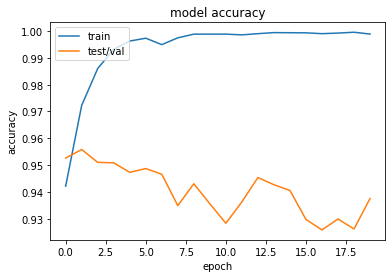

In [ ]:
#Accuracy
import matplotlib.pyplot as plt
plt.plot(fitted_lstm_model.history['accuracy'])
plt.plot(fitted_lstm_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test/val'], loc='upper left')
plt.show()

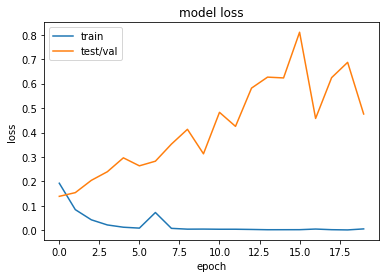

In [ ]:
#Loss
plt.plot(fitted_lstm_model.history['loss'])
plt.plot(fitted_lstm_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test/val'], loc='upper left')
plt.show()

In [ ]:
f2016 = pd.read_csv("final2016cleaned.csv")

In [ ]:
f2016

,Datetime,Text
0,2016-01,talk soros old whit billionaire funds blm leak...
1,2016-01,happynewyear everyone blm kcqfurcaxn
2,2016-01,iron fist power clamped humanity warfare terro...
3,2016-01,sadly falling bs blm loons pushing pretty path...
4,2016-01,honour police brutality sgt shamar thomas
...,...,...
1048531,2016-12,dont hear media calling obama denounce blm lik...
1048532,2016-12,walking thru derrick rose hood never seen foot...
1048533,2016-12,either way ohiostate vs clemson game blows bla...
1048534,2016-12,chant blm blackexcellence rest lives till day ...


In [ ]:
f2016.drop_duplicates(subset=['Text'])

,Datetime,Text
0,2016-01,talk soros old whit billionaire funds blm leak...
1,2016-01,happynewyear everyone blm kcqfurcaxn
2,2016-01,iron fist power clamped humanity warfare terro...
3,2016-01,sadly falling bs blm loons pushing pretty path...
4,2016-01,honour police brutality sgt shamar thomas
...,...,...
1048531,2016-12,dont hear media calling obama denounce blm lik...
1048532,2016-12,walking thru derrick rose hood never seen foot...
1048533,2016-12,either way ohiostate vs clemson game blows bla...
1048534,2016-12,chant blm blackexcellence rest lives till day ...


In [ ]:
f2016_copy = f2016.drop_duplicates(subset=['Text'])

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import load_model

# save model
lstm_model.save('final_lstm_1')
# load model
# model = load_model('final_lstm_1')
# summarize model.
lstm_model.summary()
# load dataset
# dataset = loadtxt("final2016forreal.csv", delimiter=",", encoding ='latin1')
# split into input (X) and output (Y) variables
# X = dataset1[:,0:8]
# Y = dataset1[:,8]
# # evaluate the model
# score = model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

INFO:tensorflow:Assets written to: final_lstm_1/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 37, 24)            806112    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               50000     
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
d

In [ ]:
new_tweet = ['police brutality is a super bad cause and John curse it TF']
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=200)
pred = lstm_model.predict(padded)
labels = [1,0]
print(pred)

[[5.901549e-08]]


## LSTM prediction

In [ ]:
f2016_copy.reset_index(inplace=True)

In [ ]:
f2016.reset_index(inplace=True)

In [ ]:
list_2016 = []
for i in range(len(f2016_copy)):
  list_2016.append(f2016_copy['Text'][i])

In [ ]:
list_2016_idx = tokenizer.texts_to_sequences(str(list_2016))

NameError: name 'tokenizer' is not defined

In [ ]:
def add_score_predictions(f2016_copy, list_2016_idx):

  f2016_copy['sentiment score'] = 0

  list_2016_idx = pad_sequences(list_2016_idx, maxlen=200, padding='post')

  pred = model.predict(list_2016_idx)

  f2016_copy['sentiment score'] = pred

  pred_sentiment = np.array(list(map(lambda x : 'positive' if x > 0.5 else 'negative',review_preds)))

  f2016_copy['predicted sentiment'] = 0

  f2016_copy['predicted sentiment'] = pred_sentiment

  return f2016_copy

In [ ]:
f2016_copy = add_score_predictions(f2016_copy, list_2016_idx)

In [ ]:
for tweet in f2016_copy :
    new_tweet = tweet
    seq = tokenizer.texts_to_sequences(new_tweet)
    padded = pad_sequences(seq, maxlen=200)
    pred = lstm_model.predict(padded)
    labels = [1,0]
    f2016_copy['sentiment score'] = pred
    pred_sentiment = np.array(list(map(lambda x : 'positive' if x > 0.5 else 'negative',pred)))
    f2016_copy['predicted sentiment'] = pred_sentiment

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


ValueError: Length of values (8) does not match length of index (866655)

In [ ]:
pred[0]

array([0.00018376], dtype=float32)

In [ ]:
type(pred)

numpy.ndarray

In [ ]:
type(Y_train_padded[0])

numpy.int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4693581-fe90-443f-ac3c-8c6a5843731b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>